In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [80]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.mnist.load_data()

In [81]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Text(0.5, 1.0, '5')

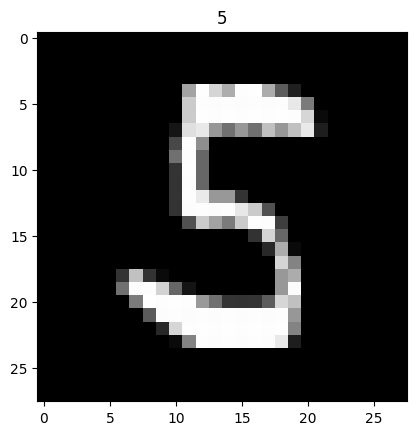

In [82]:
ind = np.random.randint(0,60000)
image = xtrain[ind]
plt.imshow(image,cmap = 'gray')
plt.title(ytrain[ind])

In [83]:
xtrain = xtrain/255.0
ytrain = tf.keras.utils.to_categorical(ytrain)
xtrain.shape,ytrain.shape

((60000, 28, 28), (60000, 10))

In [87]:
del model

In [88]:
model = tf.keras.models.Sequential()

In [89]:
model.add(tf.keras.layers.Input((28,28,1),name = 'Input'))
#chunk1
model.add(tf.keras.layers.Conv2D(16,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = 'valid',
                                 activation = 'relu'))
# output shape - 28-3+1/1 = 26 => (26,26,16)
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),
                                    strides = (2,2),
                                    padding = 'valid'))
#output shape - 26-2+2/2 = 13 => (13,13,16)

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten(name = 'Flatten'))
model.add(tf.keras.layers.Dense(64,activation = 'relu',name = 'Hidden',))
model.add(tf.keras.layers.Dense(10,activation = 'softmax',name = 'Output'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 16)        0         
                                                                 
 Flatten (Flatten)           (None, 2704)              0         
                                                                 
 Hidden (Dense)              (None, 64)                173120    
                                                                 
 Output (Dense)              (None, 10)                650       
                                                      

In [90]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics = 'accuracy')

In [91]:
model.fit(xtrain,ytrain,batch_size=64,epochs =12)

Epoch 1/12
938/938 [==============================] - 22s 22ms/step - loss: 0.8951 - accuracy: 0.7217
Epoch 2/12
938/938 [==============================] - 29s 31ms/step - loss: 0.4242 - accuracy: 0.8698
Epoch 3/12
938/938 [==============================] - 20s 21ms/step - loss: 0.3549 - accuracy: 0.8916
Epoch 4/12
938/938 [==============================] - 21s 22ms/step - loss: 0.3109 - accuracy: 0.9064
Epoch 5/12
938/938 [==============================] - 20s 21ms/step - loss: 0.2786 - accuracy: 0.9162
Epoch 6/12
938/938 [==============================] - 21s 22ms/step - loss: 0.2476 - accuracy: 0.9258
Epoch 7/12
938/938 [==============================] - 21s 22ms/step - loss: 0.2238 - accuracy: 0.9317
Epoch 8/12
938/938 [==============================] - 20s 21ms/step - loss: 0.2084 - accuracy: 0.9373
Epoch 9/12
938/938 [==============================] - 21s 22ms/step - loss: 0.1930 - accuracy: 0.9413
Epoch 10/12
938/938 [==============================] - 20s 21ms/step - loss: 0.181

In [95]:
ypred = model.predict(xtest)

313/313 [==============================] - 2s 5ms/step


In [100]:
pd.DataFrame(ypred[0]).idxmax()[0]

7

In [106]:
ypred = np.argmax(ypred,axis = 1)
ypred

array([7, 2, 1, ..., 4, 5, 6])

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [108]:
accuracy_score(ytest,ypred)

0.9451

In [109]:
cm = confusion_matrix(ytest,ypred)

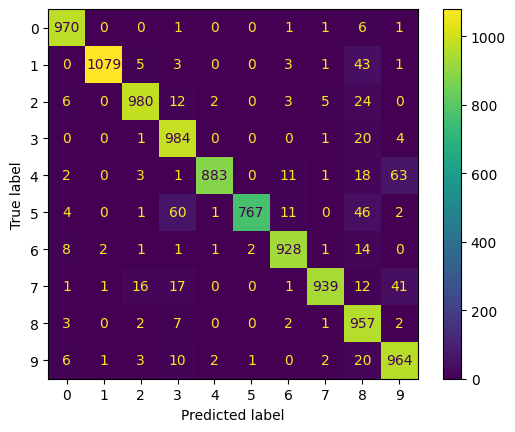

In [110]:
ConfusionMatrixDisplay(cm).plot()